In [2]:
import json

In [3]:
with open("output_1.json") as input_json:
    d = json.loads(input_json.read())

In [3]:
d['no']= dict(sorted(d['no'].items(), key=lambda item: item[1], reverse=True))

In [4]:
d['yes']= dict(sorted(d['yes'].items(), key=lambda item: item[1], reverse=True))

In [34]:
difference = {}

# Keys that are present in either dict1 or dict2
all_keys = set(d['yes'].keys()).union(set(d['no'].keys()))

for key in all_keys:
    value1 = d['yes'].get(key, 0)  # If the key is missing in dict1, use 0
    value2 = d['no'].get(key, 0)  # If the key is missing in dict2, use 0
    difference[key] = value1 - value2

print(difference)


{'8978': 0, '8877': 1, '15608': 1, '4629': 5, '7': 1, '11188': -1, '14599': 5, '1199': 1, '2972': 2, '4147': 1, '9151': 1, '8806': -1, '5949': -1, '13368': 3, '10067': 2, '120': 45, '775': 1, '5760': 7, '7305': 0, '11092': 74, '2230': 4, '3938': 1, '6149': 2, '14678': 1, '886': -1, '14273': 1, '11865': 1, '14193': 5, '8681': 4, '10404': 0, '10202': 2, '5890': 1, '5338': 3, '4372': 1, '16188': -1, '7351': -3, '3071': -1, '8310': 1, '3234': 0, '7838': 2, '3847': 1, '6050': 4, '13167': 1, '12553': 3, '1127': 1, '8893': 1, '6907': -1, '792': -2, '9394': -1, '13937': 1, '7029': 1, '480': 6, '9107': 1, '6391': 1, '1774': 1, '15414': 1, '3288': 1, '13506': 1, '5041': 1, '3617': 1, '7035': 1, '10879': 3, '6735': 0, '15266': 0, '5161': -1, '4844': 25, '6899': 2, '13997': 0, '330': 2, '6971': -1, '9500': -1, '726': 9, '566': 1, '5177': 1, '14114': 1, '15783': 1, '5426': 148, '16046': 5, '13813': -2, '16097': -1, '10515': 1, '3813': -1, '14126': 6, '13654': -1, '15732': 0, '2022': 6, '1852': 3, '

In [40]:
sorted_difference = dict(sorted(difference.items(), key=lambda item: item[1], reverse=True))

In [41]:
sorted_difference

{'9768': 327,
 '12935': 327,
 '3442': 327,
 '11527': 325,
 '11795': 314,
 '6631': 294,
 '4837': 286,
 '4223': 271,
 '1692': 246,
 '1858': 209,
 '7392': 189,
 '8112': 185,
 '8684': 182,
 '11571': 180,
 '8130': 176,
 '1761': 170,
 '7469': 162,
 '5426': 148,
 '14537': 122,
 '5376': 106,
 '5997': 101,
 '3019': 97,
 '15829': 87,
 '9982': 84,
 '994': 78,
 '6840': 75,
 '11092': 74,
 '15607': 71,
 '15596': 71,
 '15074': 71,
 '12459': 71,
 '3985': 70,
 '16123': 68,
 '7182': 68,
 '7933': 67,
 '301': 65,
 '13414': 54,
 '13413': 54,
 '7136': 54,
 '8366': 53,
 '13130': 52,
 '15156': 52,
 '14610': 50,
 '10816': 50,
 '411': 50,
 '834': 47,
 '2983': 46,
 '9007': 46,
 '120': 45,
 '12035': 44,
 '5116': 44,
 '10657': 42,
 '10461': 41,
 '6983': 39,
 '3116': 38,
 '1789': 38,
 '247': 37,
 '11593': 37,
 '9137': 36,
 '4615': 35,
 '3686': 35,
 '5816': 34,
 '6724': 33,
 '2586': 33,
 '2714': 33,
 '15955': 33,
 '8519': 32,
 '517': 32,
 '1969': 32,
 '7477': 31,
 '15361': 31,
 '12711': 30,
 '16061': 30,
 '6779': 29

In [37]:
d['yes']['7041']

5

In [42]:
d['no']['9768']

245

In [39]:
from IPython.display import IFrame
html_template = "https://neuronpedia.org/{}/{}/{}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"

def get_dashboard_html(sae_release = "gemma-2-2b", sae_id="20-gemmascope-res-16k", feature_idx=0):
    return html_template.format(sae_release, sae_id, feature_idx)

html = get_dashboard_html(sae_release = "gemma-2-2b", sae_id="20-gemmascope-res-16k", feature_idx=7041)
IFrame(html, width=1200, height=600)

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
df = pd.read_csv("gemma_predictions_truthfulQA_1.csv")

In [7]:
num_no = len(df[df['prediction']=='no'])
num_no

245

In [8]:
num_yes = len(df[df['prediction']=='yes'])
num_yes

572

In [9]:
components = list(d['yes'].keys()) + list(d['no'].keys())
components = [int(el) for el in components]
max_comp = max(components) + 1
max_comp

16384

In [10]:
yes_act = np.zeros(max_comp)
no_act = np.zeros(max_comp)
for idx, c in d['yes'].items():
    yes_act[int(idx)] = c
for idx, c in d['no'].items():
    no_act[int(idx)] = c

In [11]:
yes_act /= num_yes

In [12]:
no_act /= num_no

In [92]:
no_act[no_act>0]

array([0.00408163, 0.00408163, 0.00408163, ..., 0.00408163, 0.00816327,
       0.00408163])

In [13]:
import matplotlib.pyplot as plt

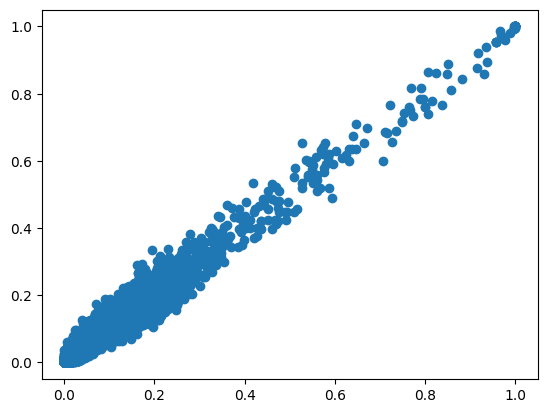

In [14]:
plt.scatter(x=yes_act, y=no_act)
plt.show()